Importing the Dependencies

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [140]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [141]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [142]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [143]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [144]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [145]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [146]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [147]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [148]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [149]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [150]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the Data into Training data & Test Data

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [152]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


Model Training

Logistic Regression

In [153]:
lr = LogisticRegression()
# training the LogisticRegression model with Training data
lr.fit(X_train,Y_train)
print("Accuracy on Traing set: ",lr.score(X_train,Y_train))
print("Accuracy on Testing set: ",lr.score(X_test,Y_test))
Y_pred_lr=lr.predict(X_test)

Accuracy on Traing set:  0.8524390243902439
Accuracy on Testing set:  0.8048780487804879


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [166]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.49 %


SVM(Support Vector Machine)

In [155]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
print("Accuracy on Traing set: ",sv.score(X_train,Y_train))
print("Accuracy on Testing set: ",sv.score(X_test,Y_test))
Y_pred_svm=sv.predict(X_test)

Accuracy on Traing set:  0.8695121951219512
Accuracy on Testing set:  0.824390243902439


In [156]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using SVM is: "+str(score_svm)+" %")

The accuracy score achieved using SVM is: 82.44 %


K-NN Classifier

In [157]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=6)  
classifier.fit(X_train, Y_train)  
print("Accuracy on Traing set: ",classifier.score(X_train,Y_train))
print("Accuracy on Testing set: ",classifier.score(X_test,Y_test))
Y_pred_knn=classifier.predict(X_test)

Accuracy on Traing set:  0.823170731707317
Accuracy on Testing set:  0.7609756097560976


In [158]:
#finding accuracy score
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 76.1 %


Decision Tree Classifier

In [159]:
from sklearn.tree import DecisionTreeClassifier
clfr = DecisionTreeClassifier(random_state=0)
clfr.fit(X_train,Y_train)
print("Accuracy on Traing set: ",clfr.score(X_train,Y_train))
print("Accuracy on Testing set: ",clfr.score(X_test,Y_test))
Y_pred_dt = clfr.predict(X_test)

Accuracy on Traing set:  1.0
Accuracy on Testing set:  1.0


In [160]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


Naive Bayes

In [161]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
print("Accuracy on Traing set: ",nb.score(X_train,Y_train))
print("Accuracy on Testing set: ",nb.score(X_test,Y_test))
Y_pred_nb = nb.predict(X_test)

Accuracy on Traing set:  0.8390243902439024
Accuracy on Testing set:  0.7804878048780488


In [162]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 78.05 %


In [173]:
scores = [score_lr,score_svm,score_nb,score_knn,score_dt]
algorithms = ["logistic regression","Support Vector Machine","Naive Bayes","K-Nearest Neighbors","Decision Tree"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using logistic regression is: 80.49 %
The accuracy score achieved using Support Vector Machine is: 82.44 %
The accuracy score achieved using Naive Bayes is: 78.05 %
The accuracy score achieved using K-Nearest Neighbors is: 76.1 %
The accuracy score achieved using Decision Tree is: 100.0 %


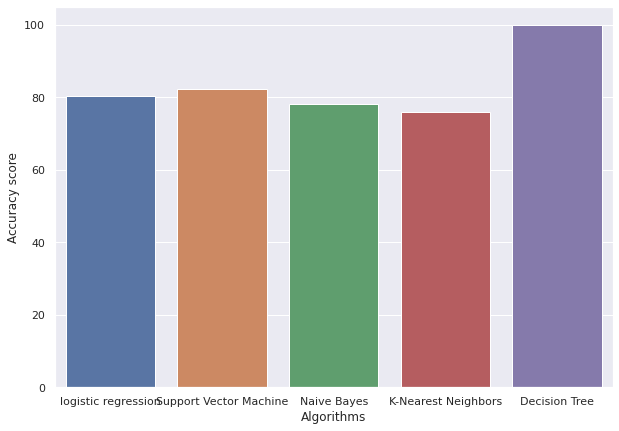

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=scores)
plt.show()


In [167]:
input_data = (53,1,0,140,203,1,0,155,1,3.1,0,0,3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
